<a href="https://colab.research.google.com/github/yasanmaduranga/Final_Year_Project/blob/main/FYT_Part_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis

# **Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing pandas
import pandas as pd

In [ ]:
news_dataset = pd.read_csv('/content/gdrive/MyDrive/mergeFinal01.csv')
news_dataset.head()

,Head_Line,Content,Date
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

Head_Line    0
Content      0
Date         0
dtype: int64

In [ ]:
# merging the Head_Line	 and Content
news_dataset['News'] = news_dataset['Head_Line']+' '+news_dataset['Content']

In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Head_Line  9161 non-null   object
 1   Content    9161 non-null   object
 2   Date       9161 non-null   object
 3   News       9161 non-null   object
dtypes: object(4)
memory usage: 286.4+ KB


# **Data Preprocessing**

Remove html tags

In [ ]:
import re as re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

news_dataset['News']=news_dataset['News'].apply(lambda cw : remove_tags(cw))
news_dataset.head()


,Head_Line,Content,Date,News
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020,Indiaâ€™s Licious raises $150 million for its ...
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020,Bazaar raises $70 million from Tiger Global an...
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020,Amazon accuses estranged Indian partner Future...
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020,COVID rapid tests available on e-commerce in C...
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020,AiFi adds new funding into its cart to expand ...


Remove Urls

In [ ]:
news_dataset['News'] = news_dataset['News'].str.replace(r's*https?://S+(s+|$)', ' ').str.strip()
news_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Head_Line,Content,Date,News
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020,Indiaâ€™s Licious raises $150 million for its ...
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020,Bazaar raises $70 million from Tiger Global an...
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020,Amazon accuses estranged Indian partner Future...
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020,COVID rapid tests available on e-commerce in C...
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020,AiFi adds new funding into its cart to expand ...


Remove Emails

In [ ]:
def remove_emails(string):
    result = re.sub('\S*@\S*\s?', '',string)
    return result


news_dataset['News']=news_dataset['News'].apply(lambda cw : remove_emails(cw))
news_dataset.head()

,Head_Line,Content,Date,News
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020,Indiaâ€™s Licious raises $150 million for its ...
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020,Bazaar raises $70 million from Tiger Global an...
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020,Amazon accuses estranged Indian partner Future...
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020,COVID rapid tests available on e-commerce in C...
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020,AiFi adds new funding into its cart to expand ...


Converting to lowercase case

In [ ]:
news_dataset['News'] = news_dataset['News'].apply(lambda x: str(x).lower())
news_dataset.head()

,Head_Line,Content,Date,News
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020,indiaâ€™s licious raises $150 million for its ...
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020,bazaar raises $70 million from tiger global an...
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020,amazon accuses estranged indian partner future...
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020,covid rapid tests available on e-commerce in c...
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020,aifi adds new funding into its cart to expand ...


Remove punctuation

In [ ]:
news_dataset['News'] = news_dataset['News'].str.replace(r'[^\w\s]+', '')
news_dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Head_Line,Content,Date,News
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020,indiaâs licious raises 150 million for its fre...
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020,bazaar raises 70 million from tiger global and...
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020,amazon accuses estranged indian partner future...
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020,covid rapid tests available on ecommerce in ch...
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020,aifi adds new funding into its cart to expand ...


Removing white space

In [ ]:
news_dataset['News']['News'] = news_dataset['News'].str.replace(r'\s{2,}', ' ',regex=True)
news_dataset.head()

,Head_Line,Content,Date,News
0,Indiaâ€™s Licious raises $150 million for its ...,"Licious, a Bengaluru-based startup that sells ...",12/31/2020,indiaâs licious raises 150 million for its fre...
1,Bazaar raises $70 million from Tiger Global an...,Dragoneer Investment Group and Tiger Global ar...,12/28/2020,bazaar raises 70 million from tiger global and...
2,Amazon accuses estranged Indian partner Future...,Amazonâ€™s two-year effort to halt a $3.4 bill...,12/25/2020,amazon accuses estranged indian partner future...
3,COVID rapid tests available on e-commerce in C...,China is allowing the public to take COVID-19 ...,12/21/2020,covid rapid tests available on ecommerce in ch...
4,AiFi adds new funding into its cart to expand ...,"Contactless stores are gaining traction, more ...",12/18/2020,aifi adds new funding into its cart to expand ...


Tokenize words and Clean-up text

In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = news_dataset.News.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['indiaas', 'licious', 'raises', 'million', 'for', 'its', 'fresh', 'animal', 'protein', 'ecommerce', 'platform', 'licious', 'bengalurubased', 'startup', 'that', 'sells', 'fresh', 'meat', 'seafood', 'and', 'other', 'fresh', 'animal', 'protein', 'online', 'and', 'which', 'became', 'the', 'nationas', 'first', 'brand', 'to', 'become', 'unicorn', 'last', 'year', 'said', 'on', 'tuesday', 'it', 'has', 'raised', 'an', 'additional', 'million', 'from', 'set', 'of', 'latestage', 'investors', 'in', 'move', 'that', 'appears', 'to', 'be', 'precursor', 'to', 'startupas', 'initial', 'public', 'offering', 'the', 'round', 'was', 'led', 'by', 'singapore', 'based', 'amansa', 'capital', 'kotak', 'pe', 'and', 'axis', 'growth', 'avenues', 'aif', 'number', 'of', 'existing', 'investors', 'as', 'well', 'as', 'new', 'set', 'of', 'angel', 'investors', 'including', 'nithin', 'kamath', 'and', 'nikhil', 'kamath', 'of', 'zerodha', 'boatas', 'aman', 'gupta', 'and', 'haresh', 'chawla', 'of', 'true', 'north', 'also', '

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Remove Stopwords, Make Bigrams/Trigram and Lemmatize

In [ ]:
!pip install stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()] for doc in texts]
            

#def remove_stopwords(texts):
#   return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
print(data_words[:1])
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
print(data_words_nostops[:1])

[['indiaas', 'licious', 'raises', 'million', 'for', 'its', 'fresh', 'animal', 'protein', 'ecommerce', 'platform', 'licious', 'bengalurubased', 'startup', 'that', 'sells', 'fresh', 'meat', 'seafood', 'and', 'other', 'fresh', 'animal', 'protein', 'online', 'and', 'which', 'became', 'the', 'nationas', 'first', 'brand', 'to', 'become', 'unicorn', 'last', 'year', 'said', 'on', 'tuesday', 'it', 'has', 'raised', 'an', 'additional', 'million', 'from', 'set', 'of', 'latestage', 'investors', 'in', 'move', 'that', 'appears', 'to', 'be', 'precursor', 'to', 'startupas', 'initial', 'public', 'offering', 'the', 'round', 'was', 'led', 'by', 'singapore', 'based', 'amansa', 'capital', 'kotak', 'pe', 'and', 'axis', 'growth', 'avenues', 'aif', 'number', 'of', 'existing', 'investors', 'as', 'well', 'as', 'new', 'set', 'of', 'angel', 'investors', 'including', 'nithin', 'kamath', 'and', 'nikhil', 'kamath', 'of', 'zerodha', 'boatas', 'aman', 'gupta', 'and', 'haresh', 'chawla', 'of', 'true', 'north', 'also', '

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Form Trigrams
data_words_Trigram_bigrams = make_trigrams(data_words_bigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_Trigram_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['licious', 'raise', 'fresh', 'ecommerce', 'platform', 'licious', 'bengalurubase', 'startup', 'sell', 'fresh', 'meat', 'seafood', 'fresh', 'online', 'become', 'brand', 'become', 'unicorn', 'last', 'year', 'say', 'raise', 'additional', 'latestage', 'investor', 'move', 'appear', 'round', 'base', 'growth', 'avenue', 'number', 'exist', 'investor', 'well', 'angel_investor', 'include', 'true', 'also', 'participate', 'round', 'funding', 'extension', 'series', 'disclose', 'last', 'year', 'bring', 'liciousa', 'accord', 'insight', 'platform', 'tracxn', 'licious', 'count', 'temasek', 'capital', 'iifl', 'backer', 'operate', 'eponymous', 'ecommerce', 'platform', 'sell', 'meat', 'seafood', 'dozen', 'indian', 'city', 'startup', 'build', 'network', 'several', 'indian', 'city', 'able', 'procure', 'meat', 'seafood', 'keep', 'fresh', 'deliver', 'hour', 'order', 'group', 'grow', 'startup', 'disrupt', 'meat', 'seafood', 'category', 'area', 'largely', 'unorganized', 'underserved', 'analyst', 'meat', 'seafo

# **Document Term Matrix**

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 2), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 5), (56, 1), (57, 1), (58, 1), (59, 3), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 6), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 6), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 2), (109, 1), (110, 2)

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('able', 1),
  ('abroad', 1),
  ('accord', 1),
  ('add', 1),
  ('additional', 1),
  ('advisor', 1),
  ('alike', 1),
  ('also', 1),
  ('analyst', 1),
  ('angel_investor', 1),
  ('announce', 1),
  ('appear', 1),
  ('area', 1),
  ('assurance', 1),
  ('avenue', 1),
  ('aœdue', 1),
  ('aœtoday', 1),
  ('backer', 1),
  ('base', 2),
  ('become', 2),
  ('believe', 1),
  ('beneficiary', 1),
  ('bengalurubase', 1),
  ('best', 2),
  ('borne', 1),
  ('brand', 2),
  ('bring', 1),
  ('build', 2),
  ('business', 1),
  ('businessesa', 1),
  ('capital', 1),
  ('captain_fresh', 1),
  ('category', 2),
  ('city', 2),
  ('cofounder', 1),
  ('company', 1),
  ('count', 1),
  ('create', 2),
  ('customer', 2),
  ('deliver', 1),
  ('digital', 1),
  ('direct', 1),
  ('disclose', 2),
  ('disrupt', 1),
  ('dividend', 1),
  ('double', 1),
  ('dozen', 1),
  ('earlier', 1),
  ('ecommerce', 2),
  ('eponymous', 1),
  ('excite', 1),
  ('execution', 1),
  ('exist', 1),
  ('extension', 1),
  ('focus', 1),
  ('fresh', 5)

# **Building the Topic LDA Model**

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"retailer" + 0.031*"consumer" + 0.030*"year" + 0.027*"say" + '
  '0.025*"sale" + 0.024*"store" + 0.019*"online" + 0.016*"retail" + '
  '0.013*"accord" + 0.012*"ecommerce"'),
 (1,
  '0.068*"product" + 0.045*"seller" + 0.042*"sell" + 0.034*"marketplace" + '
  '0.019*"sale" + 0.018*"ecommerce" + 0.017*"price" + 0.015*"online" + '
  '0.015*"market" + 0.013*"buyer"'),
 (2,
  '0.018*"make" + 0.016*"business" + 0.014*"people" + 0.013*"time" + '
  '0.013*"go" + 0.012*"think" + 0.012*"s" + 0.011*"want" + 0.011*"work" + '
  '0.010*"take"'),
 (3,
  '0.029*"product" + 0.027*"brand" + 0.019*"feature" + 0.019*"user" + '
  '0.018*"platform" + 0.016*"video" + 0.012*"content" + 0.010*"shopping" + '
  '0.010*"create" + 0.010*"social"'),
 (4,
  '0.046*"company" + 0.031*"say" + 0.029*"brand" + 0.014*"year" + '
  '0.014*"market" + 0.012*"business" + 0.009*"include" + 0.009*"also" + '
  '0.008*"ecommerce" + 0.007*"expand"'),
 (5,
  '0.014*"company" + 0.012*"employee" + 0.011*"say" + 0.008*"wou

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42336736459195434


# **find the optimal number of topics for LDA**

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values                                   
                                           
                                           
                                           
                                           
        

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=1)

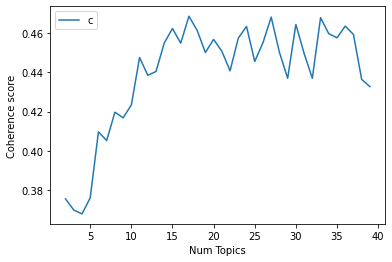

In [ ]:
import matplotlib.pyplot as plt

# Show graph
limit=40; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 5))

Num Topics = 2  has Coherence Value of 0.3755
Num Topics = 3  has Coherence Value of 0.36984
Num Topics = 4  has Coherence Value of 0.36787
Num Topics = 5  has Coherence Value of 0.37606
Num Topics = 6  has Coherence Value of 0.40968
Num Topics = 7  has Coherence Value of 0.40523
Num Topics = 8  has Coherence Value of 0.41967
Num Topics = 9  has Coherence Value of 0.4168
Num Topics = 10  has Coherence Value of 0.42337
Num Topics = 11  has Coherence Value of 0.44753
Num Topics = 12  has Coherence Value of 0.43844
Num Topics = 13  has Coherence Value of 0.44041
Num Topics = 14  has Coherence Value of 0.45494
Num Topics = 15  has Coherence Value of 0.46229
Num Topics = 16  has Coherence Value of 0.45484
Num Topics = 17  has Coherence Value of 0.46854
Num Topics = 18  has Coherence Value of 0.46132
Num Topics = 19  has Coherence Value of 0.45008
Num Topics = 20  has Coherence Value of 0.45675
Num Topics = 21  has Coherence Value of 0.45073
Num Topics = 22  has Coherence Value of 0.44074
Nu

**Running Optimal LDA Model**

In [ ]:
# Build LDA model
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=17, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
# Select the model and print the topics
# = model_list[15]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.053*"year" + 0.031*"say" + 0.020*"sale" + 0.018*"last" + 0.016*"report" + '
  '0.016*"growth" + 0.014*"company" + 0.011*"accord" + 0.011*"revenue" + '
  '0.010*"pandemic"'),
 (1,
  '0.074*"seller" + 0.062*"marketplace" + 0.057*"sell" + 0.049*"business" + '
  '0.031*"platform" + 0.029*"sale" + 0.028*"online" + 0.027*"shopify" + '
  '0.026*"local" + 0.024*"ecommerce"'),
 (2,
  '0.023*"make" + 0.016*"business" + 0.016*"time" + 0.013*"good" + '
  '0.013*"people" + 0.012*"want" + 0.012*"go" + 0.012*"take" + 0.012*"think" + '
  '0.011*"s"'),
 (3,
  '0.100*"product" + 0.023*"search" + 0.021*"offer" + 0.020*"feature" + '
  '0.015*"free" + 0.014*"store" + 0.014*"also" + 0.013*"price" + 0.013*"item" '
  '+ 0.012*"tool"'),
 (4,
  '0.028*"worker" + 0.015*"employee" + 0.009*"shareholder" + 0.009*"warehouse" '
  '+ 0.009*"safety" + 0.008*"spokesperson" + 0.008*"lease" + 0.008*"job" + '
  '0.008*"robot" + 0.008*"vaccine"'),
 (5,
  '0.041*"company" + 0.021*"work" + 0.019*"team" + 0.014*"empl

**Visualizing Topics**

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.074238  0.066632       1        1  17.657852
8      0.011281  0.144713       2        1  12.721977
0     -0.231333  0.034043       3        1  10.830245
11    -0.115932  0.122624       4        1   7.881587
9     -0.209912  0.063746       5        1   7.637530
3      0.136707  0.139017       6        1   6.371431
5     -0.154001 -0.085308       7        1   4.459512
15     0.127431  0.118260       8        1   4.065375
14    -0.139078 -0.016595       9        1   3.844528
16    -0.065935  0.013236      10        1   3.721435
13     0.162448 -0.115243      11        1   3.640360
6      0.261989  0.010757      12        1   3.411101
10     0.067628 -0.064970      13        1   3.134888
12    -0.003613 -0.192420      14        1   3.061549
7      0.143237  0.089876      15        1   2.967850
1      0.070891  0.016205      16        1   2.564215
4      0.012427 -0.344572      17        1   2.028566, topic_info=          Term          Freq         Total Category  logprob  loglift
25       brand  21209.000000  21209.000000  Default  30.0000  30.0000
250    product  28176.000000  28176.000000  Default  29.0000  29.0000
111        say  32810.000000  32810.000000  Default  28.0000  28.0000
611   retailer  17636.000000  17636.000000  Default  27.0000  27.0000
35     company  27851.000000  27851.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
900        pay    345.231431   2255.237514  Topic17  -5.2383   2.0210
621      space    336.538735   3395.057753  Topic17  -5.2638   1.5865
772     demand    334.407458   4161.459805  Topic17  -5.2701   1.3766
1259    amazon    299.032526   2801.213819  Topic17  -5.3819   1.6606
593   pandemic    281.484749   7169.373661  Topic17  -5.4424   0.6603

[1141 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
28824      6  0.998993         aaaœ
3062      12  0.882075      abandon
3062      15  0.116334      abandon
25285     12  0.994863  abandonment
488        1  0.092510       accept
...      ...       ...          ...
3061       8  0.136358        young
3061       9  0.092102        young
3061      10  0.578924        young
3061      15  0.051433        young
2327       8  0.997786      youtube

[2686 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 1, 12, 10, 4, 6, 16, 15, 17, 14, 7, 11, 13, 8, 2, 5])

In [ ]:
print(data[:1])

['indiaâs licious raises 150 million for its fresh animal protein ecommerce platform licious a bengalurubased startup that sells fresh meat seafood and other fresh animal protein online and which became the nationâs first directtoconsumer brand to become a unicorn last year said on tuesday it has raised an additional 150 million from a set of latestage investors in a move that appears to be a precursor to startupâs initial public offering\n\nthe round was led by singapore based amansa capital kotak pe and axis growth avenues aif â i a number of existing investors as well as new set of angel investors including nithin kamath and nikhil kamath of zerodha boatâs aman gupta and haresh chawla of true north also participated in the new round\n\nthe new funding â which is an extension to the 52 million series f disclosed last year â brings liciousâ alltime raise to 488 million according to insight platform tracxn\n\nlicious which counts temasek 3one4 capital and iifl among its backers operate

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14.0,0.3433,"company, market, raise, firm, investor, acquis...",indiaâs licious raises 150 million for its fre...
1,1,9.0,0.3057,"say, company, store, also, service, announce, ...",bazaar raises 70 million from tiger global and...
2,2,14.0,0.2995,"company, market, raise, firm, investor, acquis...",amazon accuses estranged indian partner future...
3,3,3.0,0.3241,"product, search, offer, feature, free, store, ...",covid rapid tests available on ecommerce in ch...
4,4,2.0,0.1855,"make, business, time, good, people, want, go, ...",aifi adds new funding into its cart to expand ...
5,5,8.0,0.3339,"customer, ecommerce, experience, business, dig...",aument wants to power your next marketing mess...
6,6,5.0,0.2066,"company, work, team, employee, role, chief, hi...",100ms secures 20m to power next generation of ...
7,7,7.0,0.1649,"payment, merchant, transaction, checkout, pymn...",ycbacked curacel unveils new api platform that...
8,8,8.0,0.1712,"customer, ecommerce, experience, business, dig...",with founders hailing from colombian unicorn r...
9,9,2.0,0.1698,"make, business, time, good, people, want, go, ...",topsort an auctionbased advertising startup no...


In [ ]:
date = pd.Series(news_dataset['Date'])

In [ ]:
dataset = pd.concat([df_dominant_topic, date], axis=1)

In [ ]:
dataset.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Date
0,0,14.0,0.3433,"company, market, raise, firm, investor, acquis...",indiaâs licious raises 150 million for its fre...,12/31/2020
1,1,9.0,0.3057,"say, company, store, also, service, announce, ...",bazaar raises 70 million from tiger global and...,12/28/2020
2,2,14.0,0.2995,"company, market, raise, firm, investor, acquis...",amazon accuses estranged indian partner future...,12/25/2020
3,3,3.0,0.3241,"product, search, offer, feature, free, store, ...",covid rapid tests available on ecommerce in ch...,12/21/2020
4,4,2.0,0.1855,"make, business, time, good, people, want, go, ...",aifi adds new funding into its cart to expand ...,12/18/2020


In [ ]:
dataset.to_csv('LDA_Final.csv')

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(17)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,14.0,"company, market, raise, firm, investor, acquis...",1571.0,0.1715
1.0,9.0,"say, company, store, also, service, announce, ...",120.0,0.0131
2.0,14.0,"company, market, raise, firm, investor, acquis...",2012.0,0.2196
3.0,3.0,"product, search, offer, feature, free, store, ...",293.0,0.0320
4.0,2.0,"make, business, time, good, people, want, go, ...",109.0,0.0119
5.0,8.0,"customer, ecommerce, experience, business, dig...",207.0,0.0226
6.0,5.0,"company, work, team, employee, role, chief, hi...",110.0,0.0120
7.0,7.0,"payment, merchant, transaction, checkout, pymn...",452.0,0.0493
8.0,8.0,"customer, ecommerce, experience, business, dig...",1333.0,0.1455
9.0,2.0,"make, business, time, good, people, want, go, ...",779.0,0.0850


In [ ]:
dataset['Dominant_Topic'].value_counts()

2.0     2012
0.0     1571
8.0     1333
9.0      779
11.0     695
7.0      452
14.0     452
15.0     390
3.0      293
5.0      207
10.0     177
13.0     175
16.0     167
1.0      120
12.0     119
6.0      110
4.0      109
Name: Dominant_Topic, dtype: int64